# Лабораторная работа №1
### Конечномерная оптимизация, градиентные методы

## Постановка задачи

1) Запрогать GD модификацию, выбрать персонально 2 функции из книжки или scikit.

2) Их визуализировать, реализовать sgd, sgd+LR schedule. 

3) Запрогать 1 моментный метод и 1 адаптивный. 

ДОП БАЛЛ: запрогать анимацию того как метод шагает по точкам на ландшафте (гифку например).

Два варианта: выбрать 100-1000 случ точек из функции и исп в качестве датасета или сгенерировать блобы 

## Градиентный спуск (+ Learning Rate Schedule)

In [1]:
from typing import Tuple, Mapping

import numpy as np
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import datasets
from matplotlib.animation import FuncAnimation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot

#GDF
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя простейшая реализация градиентного спуска.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(100):
        # так стабильнее
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)
    
#GDF+LRS
def my_GD_LRS(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01, 
              T: int = 100, lre: int = 7, g: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя простейшая реализация градиентного спуска + Learning Rate Schedule.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(100):
        if ((i%lre)==0):
            lr *= g
        # так стабильнее
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)
    

## Функция Химмельблау

$$ f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $$

In [2]:
#функция 1
def Himmelblau(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Химмельблау
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''
    return np.square(np.square(x)+y-11)+np.square(x+np.square(y)-7);

#градиент 1
def Himmelblau_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([(4*x*(np.square(x)+y-11)+2*(x+np.square(y)-7)), (2*(np.square(x)+y-11)+4*y*(x+np.square(y)-7))]);

Himmelblau(2, 3), Himmelblau_Grad(2, 3)

(32, array([-24,  40], dtype=int32))

In [3]:
#набор точек
x, y = skl.datasets.make_blobs(n_samples=10, centers=10, n_features=1, random_state=0)
# Нам нужно сравнить размерности массивов
y=np.reshape(y,x.shape)
x, y

(array([[ 9.58632291],
        [ 5.75806083],
        [ 3.25155659],
        [ 0.2458233 ],
        [ 1.01933868],
        [-1.08304078],
        [ 2.81630525],
        [ 7.63030175],
        [ 1.12031365],
        [-3.18526536]]),
 array([[8],
        [1],
        [5],
        [6],
        [3],
        [4],
        [2],
        [7],
        [0],
        [9]]))

In [4]:
#тест GD 1
my_GD(Himmelblau, Himmelblau_Grad, x, y)

(array([[-25.83344254],
        [  0.42972274],
        [  2.23180012],
        [ -0.2905227 ],
        [  1.24277447],
        [ -1.49381609],
        [  2.94033955],
        [ -9.91136201],
        [  1.67460104],
        [ -3.56368396]]),
 array([[-15.08557507],
        [  0.54657228],
        [  0.65823628],
        [ -0.92020617],
        [  2.77689833],
        [  2.84982698],
        [  2.03606408],
        [ -7.98091459],
        [  0.19489795],
        [-16.65622278]]),
 array([[4.49165658e+05],
        [1.44779721e+02],
        [4.75300931e+01],
        [1.81608054e+02],
        [4.84217523e+01],
        [3.51694589e+01],
        [1.08718079e-01],
        [8.46993399e+03],
        [9.19697596e+01],
        [7.14411943e+04]]))

In [5]:
#тест GD+LRS 1
my_GD_LRS(Himmelblau, Himmelblau_Grad, x, y)

(array([[ 9.58632291],
        [ 5.75806083],
        [ 3.25155659],
        [ 0.2458233 ],
        [ 1.01933868],
        [-1.08304078],
        [ 2.81630525],
        [ 7.63030175],
        [ 1.12031365],
        [-3.18526536]]),
 array([[8.00000000e+00],
        [1.00000000e+00],
        [5.00000000e+00],
        [6.00000000e+00],
        [3.00000000e+00],
        [4.00000000e+00],
        [2.00000000e+00],
        [7.00000000e+00],
        [1.94897947e-16],
        [9.00000000e+00]]),
 array([[1.23365194e+04],
        [5.36224812e+02],
        [4.72537513e+02],
        [8.79717541e+02],
        [5.75712123e+01],
        [9.66324365e+01],
        [1.17527523e+00],
        [5.40313844e+03],
        [1.29533735e+02],
        [5.08108258e+03]]))

(array([[-1.60844333]]), array([[0.18661172]]), array([[141.17893401]]))

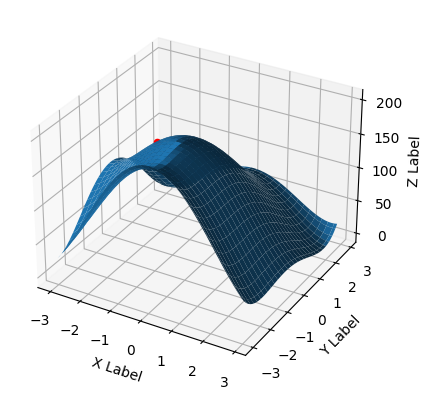

In [115]:
#тест графика обучения GD 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z)

x1, y1 = skl.datasets.make_blobs(n_samples=1, centers=None, n_features=1, random_state=0)
y1=np.reshape(y1,x1.shape)

point = my_GD(Himmelblau, Himmelblau_Grad, x1, y1)

ax.scatter(point[0][0], point[1][0], point[2][0]+3, color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
point

(array([[-1.29205812]]), array([[1.86611716e-16]]), array([[155.81805942]]))

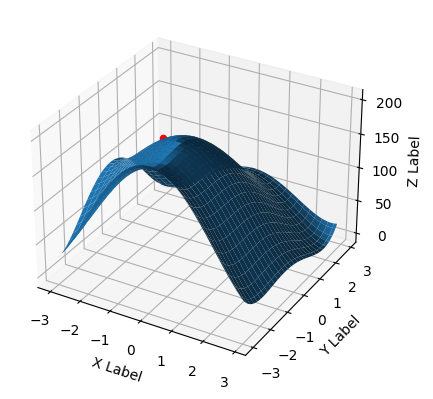

In [117]:
#тест графика обучения GD_LRS 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = b = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

ax.plot_surface(X, Y, Z)

x1, y1 = skl.datasets.make_blobs(n_samples=1, centers=None, n_features=1, random_state=0)
y1=np.reshape(y1,x1.shape)

point = my_GD_LRS(Himmelblau, Himmelblau_Grad, x1, y1)

ax.scatter(point[0][0], point[1][0], point[2][0]+3, color = "red")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
point

## Функция Комрика

$$ f(x, y) = sin(x + y)+(x - y)^2 - 1.5x + 2.5y +1 $$

In [7]:
#функция 1
def McCormick(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Химмельблау
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''
    return np.sin(x + y)+np.square(x - y)-1.5*x+2.5*y+1;

#градиент 1
def McCormick_Grad(x: np.ndarray, y: np.ndarray) -> np.float64:
    return np.array([np.cos(x+y)+2*(x-y)-1.5, np.cos(x+y)-2*(x-y)+2.5]);

McCormick(2.5, 3.4), McCormick_Grad(2.5, 3.4)

(6.186123335169764, array([-2.37252157,  5.22747843]))

In [8]:
#тест GD 2
my_GD(McCormick, McCormick_Grad, x, y)

(array([[ 9.56656908],
        [ 5.66900612],
        [ 3.30539729],
        [ 0.36591381],
        [ 1.08034077],
        [-0.95663121],
        [ 2.81394185],
        [ 7.63742961],
        [ 1.10855338],
        [-2.93548274]]),
 array([[ 8.00369909e+00],
        [ 1.06126772e+00],
        [ 4.94390297e+00],
        [ 5.84992344e+00],
        [ 2.94177564e+00],
        [ 3.88308794e+00],
        [ 1.99028881e+00],
        [ 6.99233993e+00],
        [-6.94772809e-03],
        [ 8.72237200e+00]]),
 array([[  8.14414531],
        [ 16.81325536],
        [ 12.00923623],
        [ 45.08300241],
        [  9.42779524],
        [ 35.77902832],
        [  1.43742806],
        [  8.32195113],
        [  1.45607786],
        [162.63855972]]))

In [9]:
#тест GD+LRS 2
my_GD_LRS(McCormick, McCormick_Grad, x, y)

(array([[ 9.58632291],
        [ 5.75806083],
        [ 3.25155659],
        [ 0.2458233 ],
        [ 1.01933868],
        [-1.08304078],
        [ 2.81630525],
        [ 7.63030175],
        [ 1.12031365],
        [-3.18526536]]),
 array([[ 8.00000000e+00],
        [ 1.00000000e+00],
        [ 5.00000000e+00],
        [ 6.00000000e+00],
        [ 3.00000000e+00],
        [ 4.00000000e+00],
        [ 2.00000000e+00],
        [ 7.00000000e+00],
        [-6.94772809e-18],
        [ 9.00000000e+00]]),
 array([[  8.18386194],
        [ 17.9592794 ],
        [ 12.60172212],
        [ 48.70446125],
        [ 10.12471047],
        [ 38.68461377],
        [  1.44729082],
        [  8.33268087],
        [  1.47486925],
        [176.3070856 ]]))

## Моментный метод (+ Нестерова)

In [10]:
#Nesterov Accelerated Gradient
def my_NAG(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01, 
              T: int = 100, lre: int = 7, g: float = 0.1, m: float = 0.1) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя реализация Оптимизатора Нестерова.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1.
        m (float): Коэфициент сохранения момента памяти для следующего шага. Default = 0.1.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    x_old = x0;
    y_old = y0;
    n = np.zeros(df(x,y).shape)
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        n = m*n - lr*df(x+m*n[0], y+m*n[1])
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [11]:
# NAG 1
my_NAG(Himmelblau,Himmelblau_Grad,x,y,lr=0.1,lre=20)

(array([[ 9.58632292],
        [ 5.75806084],
        [ 3.25155659],
        [ 0.2458233 ],
        [ 1.01933868],
        [-1.08304078],
        [ 2.81630525],
        [ 7.63030175],
        [ 1.12031365],
        [-3.18526536]]),
 array([[ 8.00000000e+00],
        [ 1.00000000e+00],
        [ 5.00000000e+00],
        [ 6.00000000e+00],
        [ 3.00000000e+00],
        [ 4.00000000e+00],
        [ 2.00000000e+00],
        [ 7.00000000e+00],
        [-2.16553485e-11],
        [ 9.00000000e+00]]),
 array([[1.23365194e+04],
        [5.36224812e+02],
        [4.72537514e+02],
        [8.79717542e+02],
        [5.75712123e+01],
        [9.66324365e+01],
        [1.17527523e+00],
        [5.40313844e+03],
        [1.29533735e+02],
        [5.08108259e+03]]))

## Адаптивный метод (ADAM)

In [12]:
#Adaptive - ADAM
def my_Adam(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100, lre: int = 7, g: float = 0.1, mom: float = 0.9, mom_flat: float = 0.9) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''
    Моя простейшая реализация градиентного спуска + Learning Rate Schedule + Adam.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
        lre (int): Через сколько эпох мы уменьшим lr. Default = 7.
        g (float): Коэфициент уменьшения lr [0,1). Default = 0.1
        mom (float): Коэфициент сохранения момента Default = 0.9
        mom_flat (float): Коэфициент сохранения момента сглаживания Default = 0.9
    
    Returns:
        Tuple [np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    m=np.zeros(df(x0, y0).shape)
    # Средний квадрат градиента
    Grad_SQRT=np.zeros((df(x0, y0)**2).shape)
    for i in range(T):
        if ((i%lre)==0):
            lr *= g
        m=mom*m-lr*(1-mom)*df(x0, y0)
        Grad_SQRT=mom_flat*Grad_SQRT+(1-mom_flat)*df(x0, y0)**2
        n=(lr*df(x0, y0)*m)/(Grad_SQRT+0.0000001)**0.5
        # print(M,Gadapt,n)
        x_new = x0 - n[0]
        y_new = y0 - n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [13]:
# ADAM 1
my_Adam(Himmelblau,Himmelblau_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)

(array([[ 9.58986539],
        [ 5.75859374],
        [ 3.25165858],
        [ 0.24587694],
        [ 1.01936102],
        [-1.0829997 ],
        [ 2.81631765],
        [ 7.63205617],
        [ 1.12036909],
        [-3.18522752]]),
 array([[8.00230888e+00],
        [1.00004535e+00],
        [5.00043424e+00],
        [6.00069212e+00],
        [3.00002231e+00],
        [4.00011503e+00],
        [2.00000361e+00],
        [7.00149830e+00],
        [1.94925570e-05],
        [9.00256599e+00]]),
 array([[1.23544065e+04],
        [5.36510872e+02],
        [4.72736479e+02],
        [8.80199477e+02],
        [5.75712109e+01],
        [9.66473560e+01],
        [1.17510836e+00],
        [5.40846244e+03],
        [1.29530283e+02],
        [5.08767044e+03]]))

In [14]:
# NAG 2
my_NAG(McCormick,McCormick_Grad,x,y,lr=0.1,lre=20)

(array([[ 9.58632291],
        [ 5.75806083],
        [ 3.25155659],
        [ 0.2458233 ],
        [ 1.01933868],
        [-1.08304078],
        [ 2.81630525],
        [ 7.63030175],
        [ 1.12031365],
        [-3.18526536]]),
 array([[8.00000000e+00],
        [1.00000000e+00],
        [5.00000000e+00],
        [6.00000000e+00],
        [3.00000000e+00],
        [4.00000000e+00],
        [2.00000000e+00],
        [7.00000000e+00],
        [7.71970115e-13],
        [9.00000000e+00]]),
 array([[  8.18386194],
        [ 17.9592794 ],
        [ 12.60172212],
        [ 48.70446125],
        [ 10.12471047],
        [ 38.68461377],
        [  1.44729082],
        [  8.33268087],
        [  1.47486925],
        [176.3070856 ]]))

In [15]:
# ADAM 2
my_Adam(McCormick,McCormick_Grad,x,y,lr=0.1,lre=50,mom=0.8,mom_flat=0.9)

(array([[ 9.58632489],
        [ 5.75806974],
        [ 3.25156197],
        [ 0.24583531],
        [ 1.01934478],
        [-1.08302814],
        [ 2.81630548],
        [ 7.63030246],
        [ 1.12031483],
        [-3.18524038]]),
 array([[8.00000037e+00],
        [1.00000613e+00],
        [5.00000561e+00],
        [6.00001501e+00],
        [3.00000582e+00],
        [4.00001169e+00],
        [2.00000097e+00],
        [7.00000077e+00],
        [6.94871209e-07],
        [9.00002777e+00]]),
 array([[  8.18386571],
        [ 17.95932118],
        [ 12.6017246 ],
        [ 48.70454227],
        [ 10.12470715],
        [ 38.68459065],
        [  1.44729182],
        [  8.33268095],
        [  1.47487111],
        [176.30723248]]))